# Image Processing

Image Processing a method of performing certain image operations to obtained an enhancement image or extract some useful information from it. It is a form of signal processing in which input is an image and output may be image or features/functions associated with that image.

# Image Processing Operator

A general image processing operator  is  function that takes one or more input images and produces an output image. The image transformation can be seen as :

- Point Operators (pixel transforms)
- Neighbourhood(Area based) operators

# Point Operators

The Point Operators are a simple image manipulation method in image processing in which output pixel value depends only on the corresponding input value.It includes:

1. Brightess anf Contrast adjustment
2. Color Correction and color transformation


## Brightness and Contrast adjustment

Image is a matrix in a computer system.

- Input Image: f(x,y)
- Output Image: g(x,y)

The brightness and Contrast adjustment using point operator can be represented as:

g(x,y) = a . f(x,y) + b

Where,

f(x,y) is input image and x and y are horizontal and vertical co-ordinates pointing to a pixel of an image \
g(x,y) is output image \
a is Gain,controls contrast of an image  \
b is bais,controls brightness of an image

The value of a and b is broadcasted and the point operation is applied:

- if b > 0 Brightness increases else Brighness decreases
- if a > 1 constrast is increased
- if a < 1 contrast is reduced
- if a is negative dark area becomes light and light area becomes dark.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read image 
img = cv2.imread('dataset/flower.jpg',0)


In [3]:
# image shape
img.shape

(126, 91)

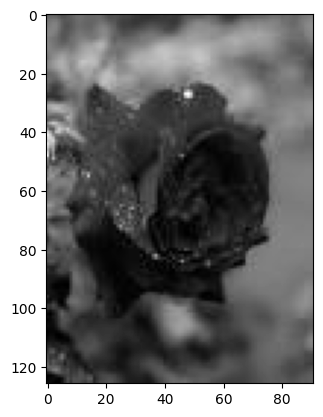

In [4]:
plt.imshow(img,cmap = 'gray')

In [5]:
print(img)

[[ 92  92  91 ... 116 120 125]
 [103 104 105 ... 120 124 129]
 [113 116 120 ... 126 130 135]
 ...
 [  2   2  10 ...  88  92  95]
 [  3   8  11 ...  91  94  97]
 [ 10   9   6 ...  91  94  97]]


In [6]:
# lets create  a new_image 
new_image = np.zeros(img.shape,img.dtype)

In [7]:
new_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# for operation g(x,y) = a . f(x,y) + b 

a = 2.5
b = 5


In [9]:
# recreating image 

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        new_image[y,x] = np.clip(a*img[y,x] + b, 0, 255)



In [10]:
new_image

array([[235, 235, 232, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 10,  10,  30, ..., 225, 235, 242],
       [ 12,  25,  32, ..., 232, 240, 247],
       [ 30,  27,  20, ..., 232, 240, 247]], dtype=uint8)

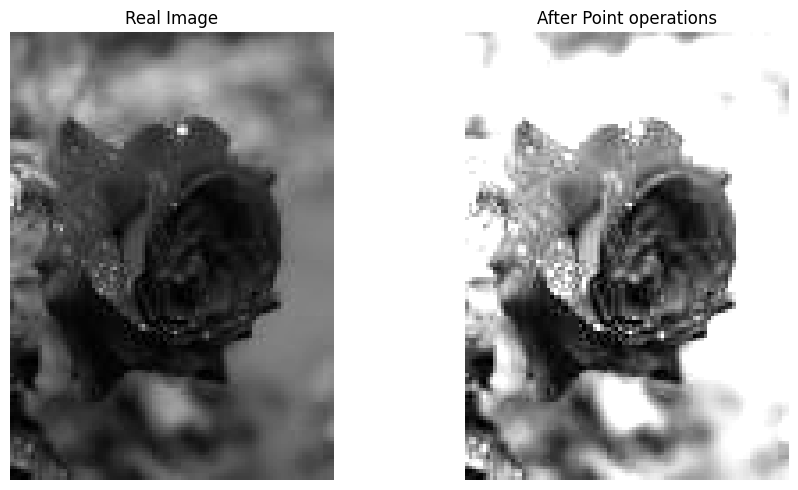

In [11]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images on the subplots
axes[0].imshow(img,cmap= 'gray')
axes[0].set_title('Real Image')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(new_image,cmap = 'gray')
axes[1].set_title('After Point operations')
axes[1].axis('off')  # Turn off axis labels

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

We can clealy see that some brightness is added in original image.

In [12]:
def plot_two_images(image, new_image,title1, title2):
    """
    Plot two Images

    Parameters
    ----------
    image:  Image or numpy.ndarray
        First Image to be plotted.
    new_image: a number or float or int 
        Second Image to be plotted.
    title1: text or string  
        Title for First Image
    title2: text or string
        Title for second Image
    """
    f, axes = plt.subplots(1, 2 , figsize=(10,8))
    axes[0].imshow(image,cmap='gray')
    axes[1].imshow(new_image,cmap='gray')
    plt.setp(axes[0], xlabel=title1)
    plt.setp(axes[1], xlabel=title2)
    f.tight_layout()
    plt.savefig('Image point operator.PNG')
    plt.show()

In [13]:
# using opencv 
new_image = cv2.convertScaleAbs(img, alpha=a, beta=b)

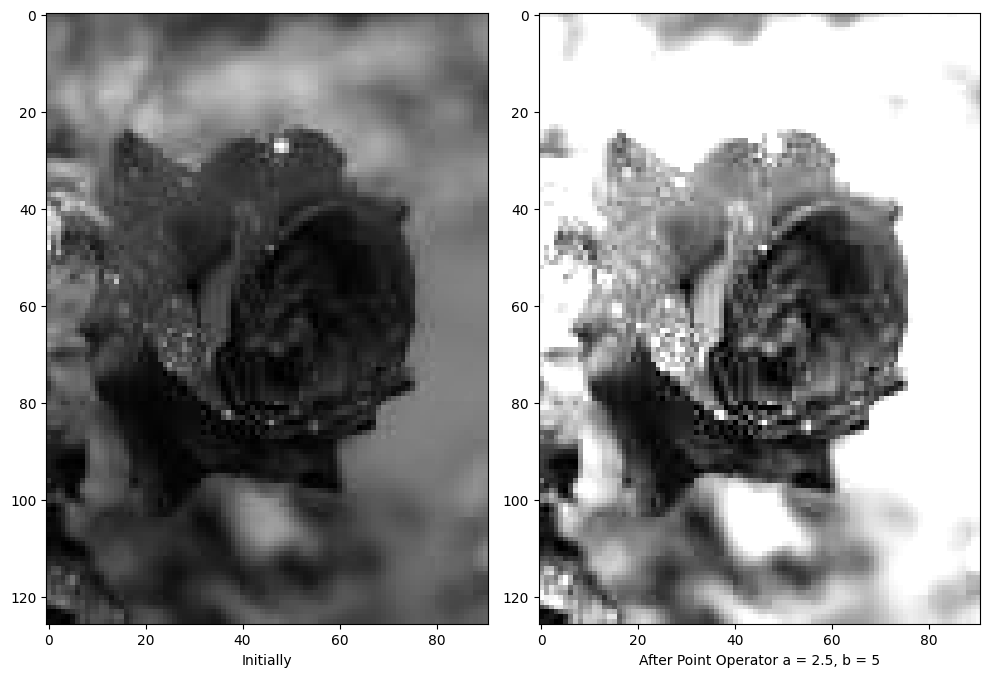

In [14]:
plot_two_images(img,new_image,title1='Initially', title2='After Point Operator a = 2.5, b = 5')

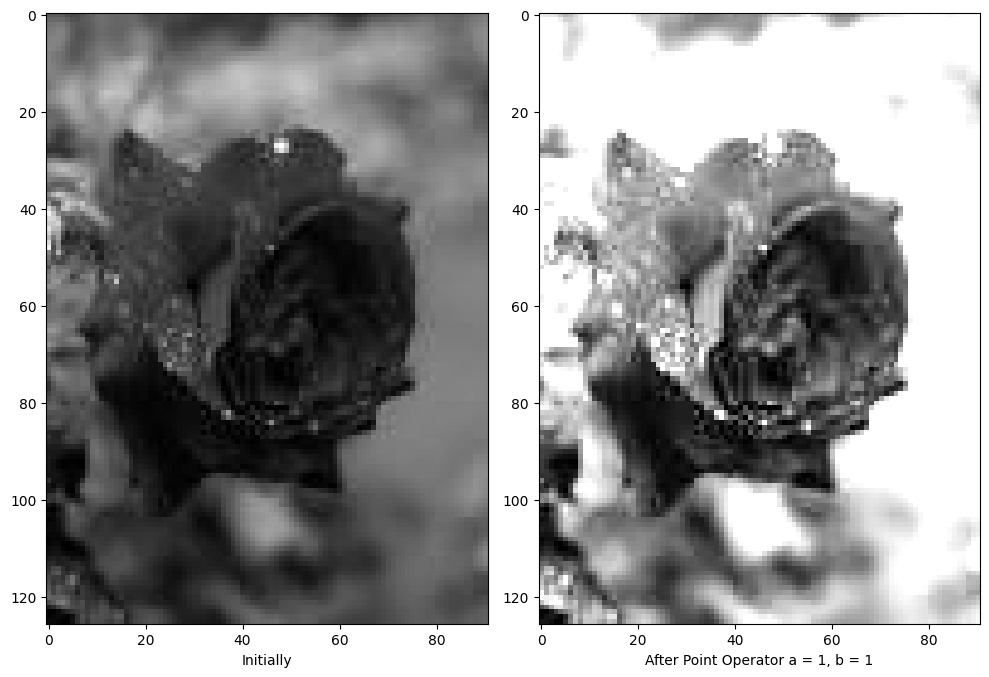

In [15]:
plot_two_images(img,new_image,title1='Initially', title2='After Point Operator a = 1, b = 1')

### Points Operators in RGB Image


In [16]:
color_image_original = cv2.imread('dataset/flower.jpg',1)
color_image_new = np.zeros(color_image_original.shape, color_image_original.dtype)

In [17]:
for width in range(color_image_original.shape[0]):
    for height in range(color_image_original.shape[1]):
        for channels in range(color_image_original.shape[2]):
            color_image_new[width,height,channels] = np.clip(
                a*color_image_original[width,height,channels] + b,
                0,
                255
            )

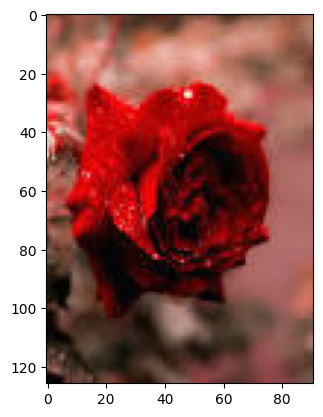

In [18]:
plt.imshow(cv2.cvtColor(color_image_original, cv2.COLOR_BGR2RGB))

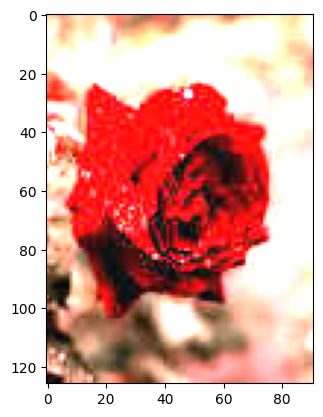

In [19]:
plt.imshow(cv2.cvtColor(color_image_new, cv2.COLOR_BGR2RGB))

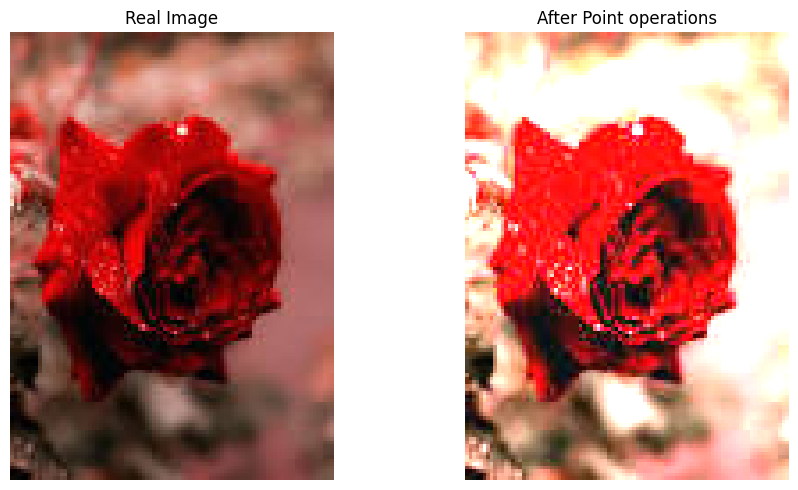

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images on the subplots
axes[0].imshow(cv2.cvtColor(color_image_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Real Image')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(cv2.cvtColor(color_image_new, cv2.COLOR_BGR2RGB))
axes[1].set_title('After Point operations')
axes[1].axis('off')  # Turn off axis labels

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Image Processing Techniques

1. Image Restoration
2. Linear Filtering
3. Independent Component Analysis
4. Pixelation
5. Template Matching
6. Image Generation Technoques

#### Image Restorarion

An image deteriorates for many reasons, for example an old image taken with old tech camera could be hazy or may lose its original form this could happen due to some physical stress or detoriate by motion blur or additive noise.

Degradtion model can undo the deterioration effects on the input image. The degradation model works as a covolution with a linear shift-invarient.

So here input image(True Image) and an image after degradarion which is called Observed Image with degradation filter which estimates the True Image"



Image impainting also known as compensation of paint loss. This technique is often used to remove unwanred objects from an image to restore damaged parts of a deteriorated image.

In [21]:
# read image
img = cv2.imread('dataset/cat_damaged.png',0)
print(img.shape,img.dtype)
# masked image
mask = cv2.imread('dataset/cat_mask.png',0)
print(mask.shape,mask.dtype)

(400, 400) uint8
(400, 400) uint8


In [22]:
# image inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

cv2.imwrite('dataset/restored.png', dst)

True

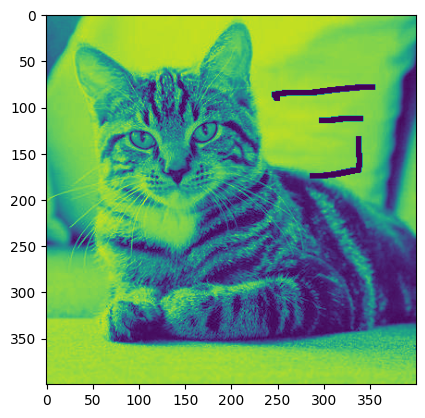

In [23]:
plt.imshow(img)

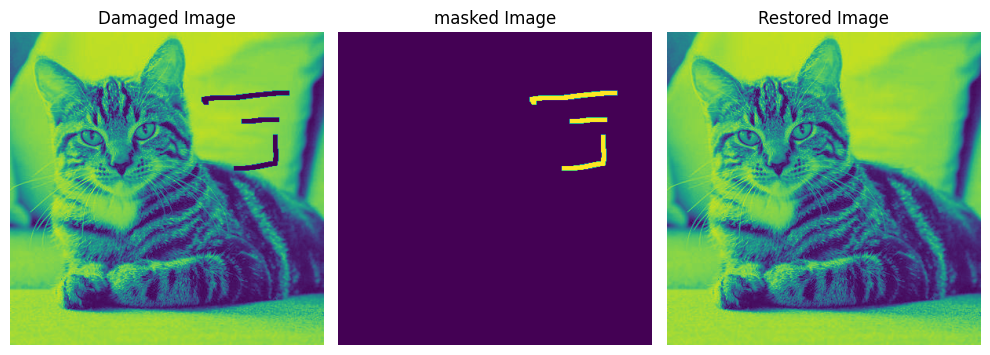

In [24]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Display the images on the subplots
axes[0].imshow(img)
axes[0].set_title('Damaged Image')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(mask)
axes[1].set_title('masked Image')
axes[1].axis('off')  # Turn off axis labels

axes[2].imshow(dst)
axes[2].set_title('Restored Image')
axes[2].axis('off')  # Turn off axis labels

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

The biggest problem with OpenCV’s image inpainting is that we need to manually input a mask for the specific image we want to fix. 

#### Linear Filtering

Linear Filtering is a process in which the value of the output pixel is linear Combinations of the neighbouring input pixels.This Process is called convolution.
Convolution is the process of adding each element of the images to its local neighbours, weighted by the kernel.

Input Image * Filter = Output Image

This filter works as a sliding window to convolve over the image.We multilply each pixel by the corresponding kernel and then take the sum.That sum becomes a new pixel in the output image.


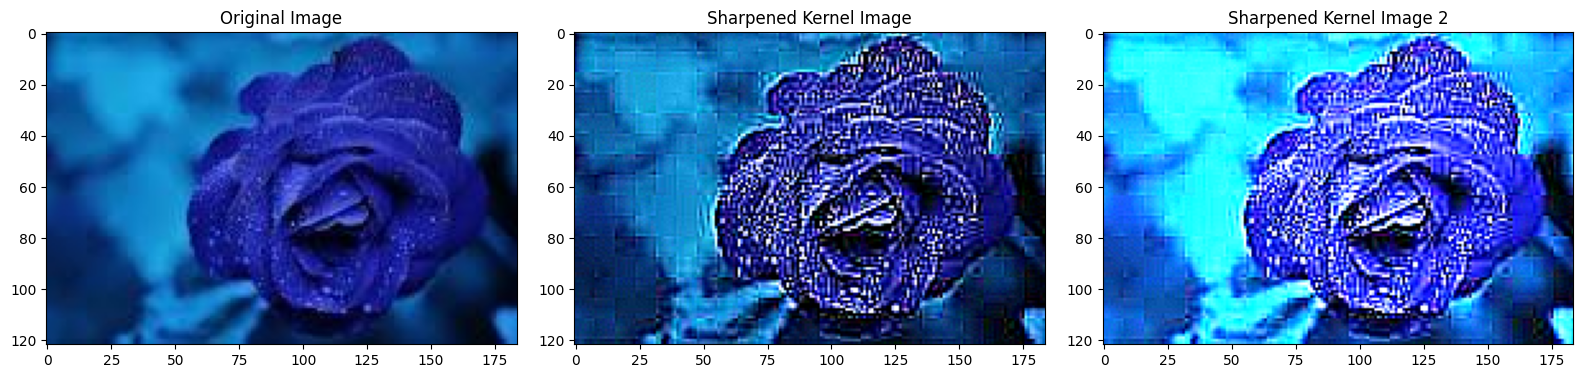

In [25]:
# Load the image
image = cv2.imread("dataset/flowers.jpeg")

# Create a matplotlib figure with three subplots in a single row
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

# Display the original image in the first subplot
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

# Define a sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

# Define a second sharpening kernel
kernel_sharpening_2 = np.array([[-1, -1, -1],
                               [-1, 10, -1],
                               [-1, -1, -1]])

# Apply the first sharpening kernel to the original image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
# Display the result in the second subplot
ax[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')

# Apply the second sharpening kernel to the original image
sharpened_2 = cv2.filter2D(image, -1, kernel_sharpening_2)
# Display the result in the third subplot
ax[2].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')

# Show the matplotlib plot with the original and sharpened images
plt.show()


#### Independent Component Analysis 

Independent Component Analysis is a technique for separaing a multivariate signal into its underlying component. ICA helps in the extraction of the desired component from the mixtre of multiple components or signals.

In ICA, we "whiten" our signal. This meand=s that a given will be transforemd in a way tat potential correleations between its component are removed and the variance of each component is equal to 1.

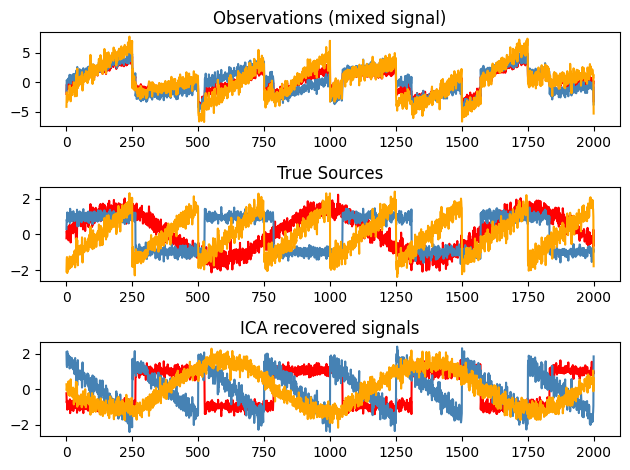

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

#### Pixelation
Pixelation refers to the visual effect of making an image or a portion of an image appear blocky or pixelated by reducing its resolution or increasing the size of its individual pixels. It is often used as a form of digital censorship or privacy protection to obscure sensitive information or identities in images or videos.Pixelation occurs when resizing of the images are enlarged to a point where individual pixels can be observed or pixels stretch to the point beyond their original size.Pixelation is typically achieved by reducing resoultion, using pixelation filters and manual pixelation.

In [27]:
# Get Input image
input_image = cv2.imread('dataset/flowers.jpeg')

# Get input size
height, weight = input_image.shape[:2]

#desired "pixelated" size
w,h = (16, 16)

# Resize input to "pixelated" size
temp = cv2.resize(input_image, (w, h), interpolation=cv2.INTER_LINEAR)

# Initialize output image
output_image = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)





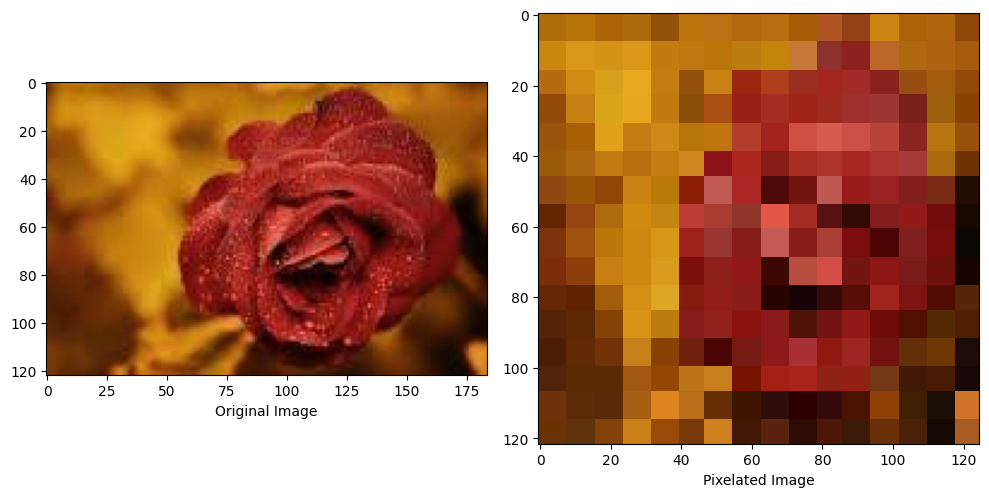

In [28]:
plot_two_images(input_image,output_image,title1='Original Image', title2='Pixelated Image')

#### Template Matching
Template matching is a technique used in image processing and computer vision to locate a specific subimage (template) within a larger image. It works by comparing the template image to different regions of the larger image and finding areas where the template best matches the region.n template matching, we slide the template image over the larger image as we do in the convolution process and find the matching part.


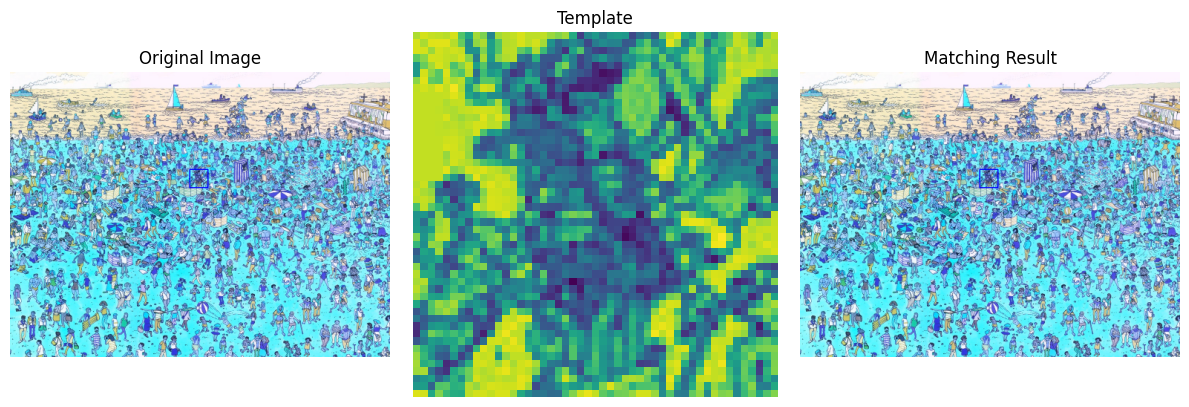

In [41]:
# Load the original image
img_rgb = cv2.imread('dataset/template_matching.jpg')
img_rgb_copy = img_rgb.copy()  # Make a copy for drawing results

# Load the template image
template = cv2.imread('dataset/template.jpg', 0)
w, h = template.shape[::-1]

# Convert the original image to grayscale
img_gray = cv2.cvtColor(img_rgb_copy, cv2.COLOR_BGR2GRAY)

# Match the template in the original image
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

# Draw rectangles around the matched regions
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb_copy, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display the original image, template, and image with matching regions
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(template)
plt.title('Template')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_rgb_copy)
plt.title('Matching Result')
plt.axis('off')

plt.tight_layout()
plt.show()


We can see a blue rectangle which match the template in the given images.


Resources:
1. Image Processing Tehniques: (https://neptune.ai/blog/image-processing-techniques-you-can-use-in-machine-learning)
2. Image Procesing : (https://www.javatpoint.com/dip-image-transformations)
